In [ ]:
"""
NEURAL NINE:
https://www.youtube.com/watch?v=VmbA0pi2cRQ

Linear regression
"""

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#pip install scipy
from scipy import stats 
import numpy as  np

Visualization

In [3]:
data = pd.read_csv("1.1_data_studytime-score.csv")
print(data.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [40]:
data2 = pd.read_csv("1.2_data_Student Study Hour V2.csv") 
print(data2)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
25    1.3      19
26    2.6      30
27    6.1      63


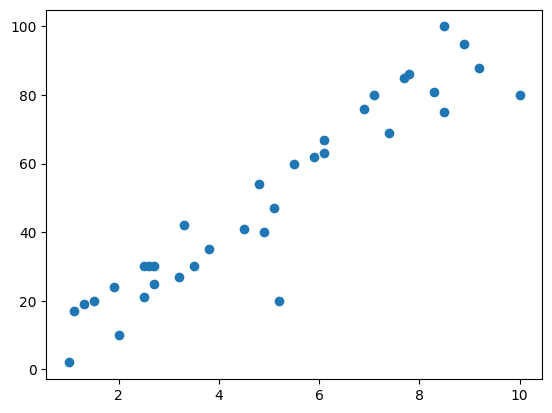

In [4]:
plt.scatter(data.Hours, data.Scores)
plt.show()

SECCIÓN PARA OUTLIERS SOLO 

BOX PLOT HOURS Axes(0.125,0.11;0.775x0.77)
Position of the outlier (array([ 3,  6,  8, 15, 33, 34], dtype=int64),)


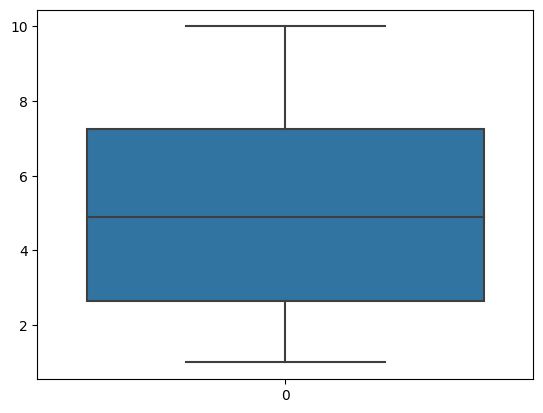

In [24]:
# OUTLIERS 

# Box Plot
import seaborn as sns
print("BOX PLOT HOURS", sns.boxplot(data['Hours']))


# Position of the Outlier
import numpy as np
print("Position of the outlier", np.where(data['Hours']>8.0))


BOX PLOT SCORES Axes(0.125,0.11;0.775x0.77)
Position of the outlier (array([ 6, 15, 24, 34], dtype=int64),)


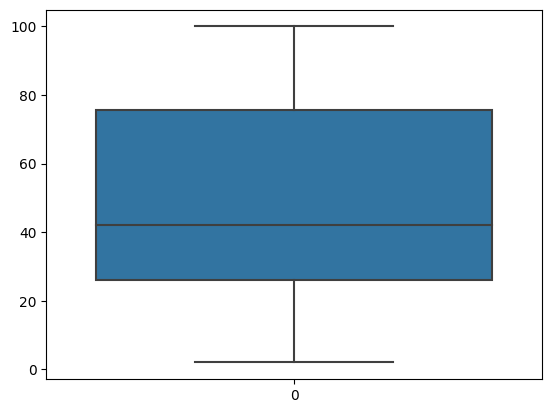

In [31]:

print("BOX PLOT SCORES", sns.boxplot(data['Scores']))

# Position of the Outlier

print("Position of the outlier", np.where(data['Scores']>85))




Linear Regression model

In [41]:
# LOSS FUNCTION -manually

def loss_function(m,b, points):
    total_error =0 
    n = len(points)
    for i in range(len(points)):
        x = points.iloc[i].Hours
        y= points.iloc[i].Scores
        total_error += (y-(m*x + b))**2
        #print(points.iloc[5].Score)
    return total_error/ float(n)



In [57]:
# Gradient descent

def gradient_descent(m_now,b_now, points, L):
    m_gradient=0
    b_gradient = 0
    n= len(points)

    for i in range(n):
        x = points.iloc[i].Hours
        y = points.iloc[i].Scores

        m_gradient += - (2/n) * x * (y - (m_now * x * b_now))
        b_gradient += - (2/n) * (y - (m_now * x * b_now))


    m = m_now - m_gradient*L
    b = b_now - b_gradient * L

    return m, b


m= 0
b = 0
L = 0.001 #learning rate 
epochs = 60


learning_rates =[]
loss_values = []


for i in range(epochs):
    if i % 20 == 0:
        error = loss_function(m,b,data)
        print(f"Epoch:{i}/n Mean Squared Error:{error}")
        learning_rates.append(L)
        loss_values.append(error)


    m,b = gradient_descent(m,b,data2,L) # aquí pongo los parámetros, en lugar de data, uso data2

print("Final coefficients: ", m,b)


Epoch:0/n Mean Squared Error:3192.4285714285716
Epoch:20/n Mean Squared Error:279.3623618082313
Epoch:40/n Mean Squared Error:204.34946272836035
Final coefficients:  7.6785051564082885 1.3370568918793686


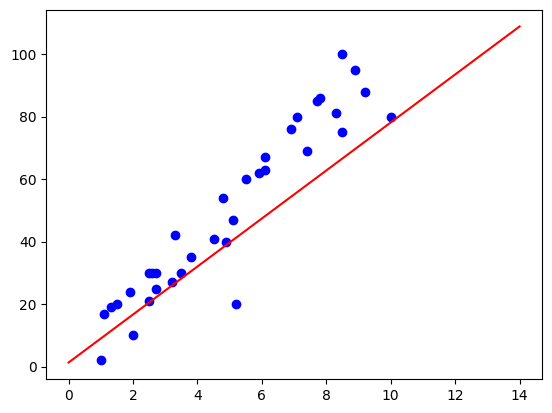

In [58]:
plt.scatter(data.Hours, data.Scores, color= "blue")
plt.plot(list(range(0,15)), [m*x+b for x in range(0,15)], color="red")
plt.show()

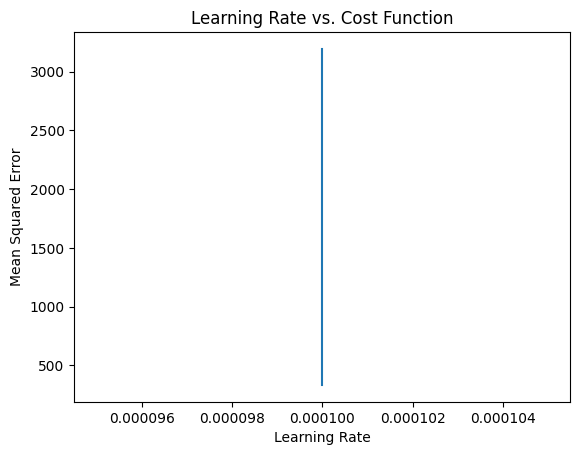

In [44]:
# learning curve

plt.plot(learning_rates, loss_values)
plt.xlabel("Learning Rate")
plt.ylabel("Mean Squared Error")
plt.title("Learning Rate vs. Cost Function")

plt.show()

OPTION 2: I create a loop to get the best learning rate

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient descent

def gradient_descent(m_now,b_now, points, L):
    m_gradient=0
    b_gradient = 0
    n= len(points)

    for i in range(n):
        x = points.iloc[i].Hours
        y = points.iloc[i].Scores

        m_gradient += - (2/n) * x * (y - (m_now * x * b_now))
        b_gradient += - (2/n) * (y - (m_now * x * b_now))


    m = m_now - m_gradient*L
    b = b_now - b_gradient * L

    return m, b






# LOSS FUNCTION -manually

def loss_function(m,b, points):
    total_error =0 
    n = len(points)
    for i in range(len(points)):
        x = points.iloc[i].Hours
        y= points.iloc[i].Scores
        total_error += (y-(m*x + b))**2
        #print(points.iloc[5].Score)
    return total_error/ float(n)



In [69]:

# Initialize parameters
m = 0
b = 0
epochs = 100

# List of learning rates to try
learning_rates = [0.001, 0.0001, 0.00001]

best_learning_rate = None
best_loss = float('inf')  # Initialize with a high value

for L in learning_rates:
    current_loss_values = []

    for i in range(epochs):
        if i % 20 == 0:
            error = loss_function(m, b, data)
            current_loss_values.append(error)
        m, b = gradient_descent(m, b, data, L)

    final_loss = current_loss_values[-1]

    if final_loss < best_loss:
        best_loss = final_loss
        best_learning_rate = L

    # Reset parameters for the next learning rate
    m = 0
    b = 0

print("Best Learning Rate:", best_learning_rate)

# Plot learning curve for the best learning rate
final_loss_values = [loss_function(m, b, data) for _ in range(epochs)]


Best Learning Rate: 0.001


In [73]:
print(len(current_loss_values))

5


In [74]:
print(len(final_loss_values))

100


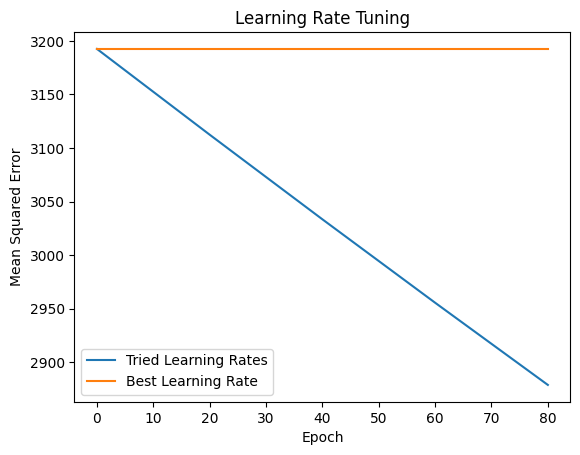

In [75]:

plt.plot(range(0, epochs, 20), current_loss_values, label="Tried Learning Rates")
plt.plot(range(0, epochs, 20), final_loss_values[:len(current_loss_values)], label="Best Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("Learning Rate Tuning")
plt.legend()
plt.show()